# Analiza statistike Premier lige v sezoni 2023/2024

Analizirala bom podatke o igralcih in ekipah iz Premier lige v sezoni 2023/2024, ki so objavljeni na spletni strani [fbref.com](https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats).

Spodaj so predstavljeni podatki s tabelo. Kratice v stolpcu Položaj imajo naslednje pomene: GK - golman, DF - obrambni igralec, MF - vezni igralec, FW - napadalec.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 20)

df = pd.read_csv('podatki/igralci.csv', index_col='Ime')
df

,Narodnost,Položaj,Ekipa,Starost,Odigrane tekme,Minute,Goli,Asistence,Rumeni kartoni,Rdeči kartoni
Ime,,,,,,,,,,
Max Aarons,ENG,DF,Bournemouth,23,20,1237,0,1,1,0
Joshua Acheampong,ENG,DF,Chelsea,17,1,6,0,0,0,0
Bénie Adama Traore,CIV,"FW, MF",Sheffield Utd,20,8,387,0,0,0,0
Tyler Adams,USA,MF,Bournemouth,24,3,121,0,0,0,0
Tosin Adarabioyo,ENG,DF,Fulham,25,20,1617,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
Nicolò Zaniolo,ITA,"FW, MF",Aston Villa,24,25,839,2,0,7,0
Anass Zaroury,MAR,"FW, MF",Burnley,22,6,152,0,0,0,1
Oleksandr Zinchenko,UKR,DF,Arsenal,26,27,1722,1,2,2,0


Bolj pregledno je, če igralce razvrstimo glede na število golov in asistenc.

In [3]:
urejeno_goli_asistence = df.sort_values(['Goli', 'Asistence'], ascending=[False, False])
urejeno_goli_asistence

,Narodnost,Položaj,Ekipa,Starost,Odigrane tekme,Minute,Goli,Asistence,Rumeni kartoni,Rdeči kartoni
Ime,,,,,,,,,,
Erling Haaland,NOR,FW,Manchester City,23,31,2552,27,5,1,0
Cole Palmer,ENG,"FW, MF",Chelsea,21,33,2607,22,11,7,0
Alexander Isak,SWE,FW,Newcastle Utd,23,30,2255,21,2,1,0
Ollie Watkins,ENG,FW,Aston Villa,27,37,3217,19,13,4,0
Phil Foden,ENG,"FW, MF",Manchester City,23,35,2857,19,8,2,0
...,...,...,...,...,...,...,...,...,...,...
Joe White,ENG,MF,Newcastle Utd,20,4,13,0,0,1,0
Joe Worrall,ENG,DF,Nott'ham Forest,26,7,439,0,0,0,1
Yehor Yarmoliuk,UKR,MF,Brentford,19,27,688,0,0,2,0


Poglejmo, kateri igralci so zadeli več kot 15 golov, in jih razvrstimo po starosti.

In [4]:
kriterij_goli = df.Goli > 15
urejeno_po_starosti = df[kriterij_goli].sort_values('Starost', ascending=True)
urejeno_po_starosti[['Narodnost', 'Položaj','Ekipa', 'Starost', 'Odigrane tekme','Minute', 'Goli', 'Asistence']]

,Narodnost,Položaj,Ekipa,Starost,Odigrane tekme,Minute,Goli,Asistence
Ime,,,,,,,,
Cole Palmer,ENG,"FW, MF",Chelsea,21,33,2607,22,11
Bukayo Saka,ENG,FW,Arsenal,21,35,2919,16,9
Phil Foden,ENG,"FW, MF",Manchester City,23,35,2857,19,8
Erling Haaland,NOR,FW,Manchester City,23,31,2552,27,5
Alexander Isak,SWE,FW,Newcastle Utd,23,30,2255,21,2
Dominic Solanke,ENG,FW,Bournemouth,25,38,3325,19,3
Jarrod Bowen,ENG,FW,West Ham,26,34,3019,16,6
Jean-Philippe Mateta,FRA,FW,Crystal Palace,26,35,2282,16,5
Ollie Watkins,ENG,FW,Aston Villa,27,37,3217,19,13


Kateri igralci so imeli najboljše razmerje golov na tekmo (goals per game ratio)?

In [5]:
stolpec_goli_na_tekmo = round(df.Goli / df['Odigrane tekme'], 2)
df.insert(8, 'Razmerje golov na tekmo', stolpec_goli_na_tekmo)
urejeno_razmerje_golov = df.sort_values('Razmerje golov na tekmo', ascending=False).head(20)
urejeno_razmerje_golov[['Narodnost', 'Položaj','Ekipa', 'Starost', 'Odigrane tekme','Minute', 'Goli', 'Asistence', 'Razmerje golov na tekmo']]

,Narodnost,Položaj,Ekipa,Starost,Odigrane tekme,Minute,Goli,Asistence,Razmerje golov na tekmo
Ime,,,,,,,,,
Erling Haaland,NOR,FW,Manchester City,23,31,2552,27,5,0.87
Alexander Isak,SWE,FW,Newcastle Utd,23,30,2255,21,2,0.70
Cole Palmer,ENG,"FW, MF",Chelsea,21,33,2607,22,11,0.67
Mohamed Salah,EGY,FW,Liverpool,31,32,2534,18,10,0.56
Phil Foden,ENG,"FW, MF",Manchester City,23,35,2857,19,8,0.54
Michael Olise,FRA,"FW, MF",Crystal Palace,21,19,1275,10,6,0.53
Ollie Watkins,ENG,FW,Aston Villa,27,37,3217,19,13,0.51
Dominic Solanke,ENG,FW,Bournemouth,25,38,3325,19,3,0.50
Son Heung-min,KOR,FW,Tottenham,31,35,2934,17,10,0.49


Opazimo, da se med njimi pojavijo tudi igralci, ki so odigrali manj kot 20 tekem. Zdi se nam, da sta število odigranih tekem oz. minut in številov golov med seboj povezana. Oglejmo si, ali večja prisotnost igralcev na tekmah res vpliva na število danih golov.

Text(0.5, 1.0, 'Povezava med odigranimi minutami in goli')

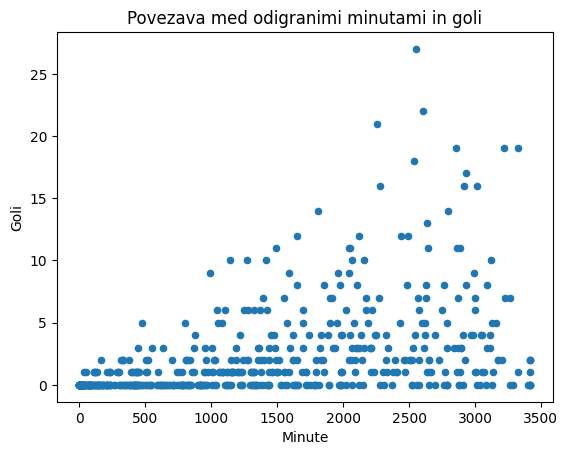

In [6]:
df.plot.scatter('Minute', 'Goli')
plt.title('Povezava med odigranimi minutami in goli')

Iz razpršenega diagrama lahko razberemo, da sta število odigranih minut in število golov res v pozitivni korelaciji, a hkrati je dosti igralcev, ki so odigrali veliko minut in zadeli malo golov. Če pomislimo, mednje verjetno spadajo tudi igralci, ki niso napadalci oz. vezisti, torej golmani in obrambni igralci. Poglejmo, kako se diagram spremeni, če te igralce izključimo.

Text(0.5, 1.0, 'Povezava med odigranimi minutami in goli pri vezistih in napadalcih')

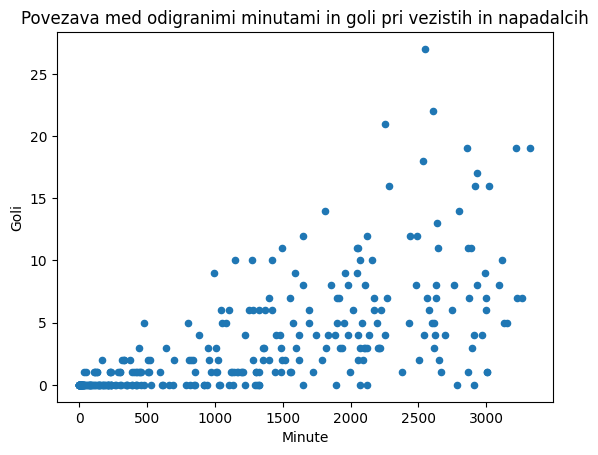

In [7]:
kriterij_golman = df.Položaj.str.contains('GK')
kriterij_obrambni = df.Položaj.str.contains('DF')

df[~kriterij_golman & ~kriterij_obrambni].plot.scatter('Minute', 'Goli')
plt.title('Povezava med odigranimi minutami in goli pri vezistih in napadalcih')

Razvidno je, da je bilo dosti igralcev iz prejšnjega diagrama, ki so zadeli pod 5 golov in igrali veliko minut, res golmanov ali obrambnih igralcev.
Sedaj si poglejmo še, katerih 20 igralcev je odigralo največ tekem.

In [8]:
urejeno_odigrane_tekme = df.sort_values(['Odigrane tekme','Minute'], ascending=False).head(20)
urejeno_odigrane_tekme[['Položaj','Ekipa','Odigrane tekme','Minute']]

,Položaj,Ekipa,Odigrane tekme,Minute
Ime,,,,
Max Kilman,DF,Wolves,38,3420
Bernd Leno,GK,Fulham,38,3420
André Onana,GK,Manchester Utd,38,3420
Jordan Pickford,GK,Everton,38,3420
William Saliba,DF,Arsenal,38,3420
Guglielmo Vicario,GK,Tottenham,38,3420
James Tarkowski,DF,Everton,38,3419
Joachim Andersen,DF,Crystal Palace,38,3415
Thomas Kaminski,GK,Luton Town,38,3405


Način igre posameznika lahko opazujemo tudi preko števila prejetih rdečih kartonov. Spodnjih 20 igralcev je dobilo največ rdečih kartonov. Če v tabelo dodamo stolpec s skupnim številom rumenih in rdečih kartonov, lahko vidimo, da igralci z največ rdečimi kartoni niso tudi igralci z največ kartoni.

In [9]:
df['Rumeni in rdeči kartoni'] = df['Rdeči kartoni'] + df['Rumeni kartoni']
urejeno_rdeci_rumeni = df.sort_values(['Rdeči kartoni', 'Rumeni kartoni'], ascending=[False, False]).head(20)
urejeno_rdeci_rumeni[['Položaj', 'Ekipa', 'Rumeni kartoni', 'Rdeči kartoni', 'Rumeni in rdeči kartoni']]

,Položaj,Ekipa,Rumeni kartoni,Rdeči kartoni,Rumeni in rdeči kartoni
Ime,,,,,
Yves Bissouma,MF,Tottenham,10,2,12
Oliver McBurnie,FW,Sheffield Utd,7,2,9
Reece James,DF,Chelsea,2,2,4
Anthony Gordon,FW,Newcastle Utd,12,1,13
Mario Lemina,MF,Wolves,12,1,13
Anel Ahmedhodžić,DF,Sheffield Utd,11,1,12
Sander Berge,MF,Burnley,10,1,11
Nélson Semedo,"DF, MF",Wolves,10,1,11
Jordan Ayew,"FW, MF",Crystal Palace,9,1,10


Iz zgornje tabele se zdi, da so igralci z veliko kartoni v večini obrambni ali vezni igralci. Poglejmo, če je ta hipoteza pravilna.

Text(0.5, 1.0, 'Igralci po številu rumenih in rdečih kartonov')

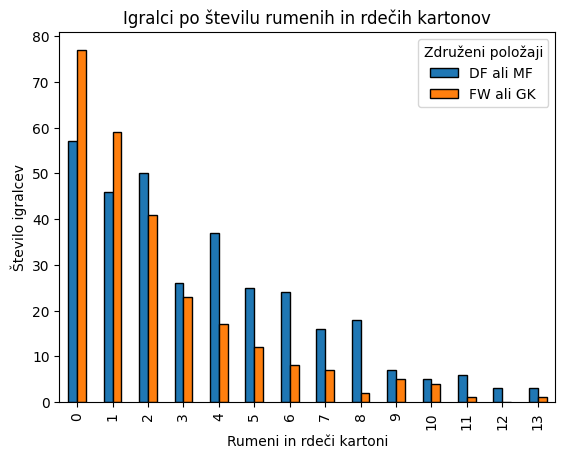

In [10]:
def polozaj(niz):
    if 'FW' in niz:
        return 'FW ali GK'
    elif 'DF' in niz:
        return 'DF ali MF'
    elif 'MF' in niz:
        return 'DF ali MF'
    else:
        return 'FW ali GK'

df['Združeni položaji'] = df['Položaj'].apply(polozaj)

po_kartonih_in_polozaju = df.groupby(['Rumeni in rdeči kartoni', 'Združeni položaji']).size().unstack()

po_kartonih_in_polozaju.plot.bar(edgecolor='black')

plt.ylabel('Število igralcev')
plt.title('Igralci po številu rumenih in rdečih kartonov')

Iz zgornjega grafa je razvidno, da imajo v večini primerov (z izjemo 0 kartonov in 1 karton) obrambni in vezni igralci več kartonov kot golmani in napadalci. Torej je bila naša hipoteza pravilna.

Igralci so precej različnih starosti. Poglejmo si, katera je najpogostejša starost in koliko so stari najmlajši in najstarejši igralci.

In [11]:
st_igralcev_po_starosti = df.groupby('Starost').size()
print(st_igralcev_po_starosti)

najnizja_starost = df['Starost'].min()
najvisja_starost = df['Starost'].max()

# Pridobi igralce z najnizjo in najvisjo starostjo
igralci_najnizja_starost = df[df['Starost'] == najnizja_starost]
igralci_najvisja_starost = df[df['Starost'] == najvisja_starost]

# Pridobi imena igralcev
najmlajsi = igralci_najnizja_starost.index.tolist()
najstarejsi = igralci_najvisja_starost.index.tolist()

print(f'Najmlajši igralci ({",".join(najmlajsi)}) so stari {najnizja_starost} let, najstarejši igralci ({", ".join(najstarejsi)}) pa {najvisja_starost} let.')

najbolj_pogosta_starost = st_igralcev_po_starosti.idxmax()
igralci_najbolj_pogosta_starost = df[df['Starost'] == najbolj_pogosta_starost]
imena_igralcev = igralci_najbolj_pogosta_starost.index.tolist()
print(f'Največ igralcev je starih {najbolj_pogosta_starost} let.\nMed njimi so:\n{",\n".join(imena_igralcev)}')

Starost
15     1
16     1
17    10
18    30
19    32
      ..
33    11
34     9
35     5
37     1
38     3
Length: 23, dtype: int64
Najmlajši igralci (Mikey Moore) so stari 15 let, najstarejši igralci (Łukasz Fabiański, Thiago Silva, Ashley Young) pa 38 let.
Največ igralcev je starih 26 let.
Med njimi so:
Ola Aina,
Sofyan Amrabat,
Fodé Ballo-Touré,
Donny van de Beek,
Rodrigo Bentancur,
Yves Bissouma,
Jarrod Bowen,
David Brooks,
Reece Burke,
Dominic Calvert-Lewin,
Ben Chilwell,
Lewis Cook,
Maxwel Cornet,
Arnaut Danjuma,
Rúben Dias,
Luis Díaz,
Issa Diop,
Joe Gomez,
Gustavo Hamer,
Jack Harrison,
Dean Henderson,
Rico Henry,
Mason Holgate,
Gabriel Jesus,
Joelinton,
Diogo Jota,
Sasa Kalajdzic,
Thilo Kehrer,
Max Kilman,
Max Lowe,
Saša Lukić,
James Maddison,
Benson Manuel,
Jean-Philippe Mateta,
Neal Maupay,
Neal Maupay,
Scott McKenna,
Scott McTominay,
Kaoru Mitoma,
Gonzalo Montiel,
Chiedozie Ogbene,
Fred Onyedinma,
Ionuț Radu,
Sergio Reguilón,
Sergio Reguilón,
Richarlison,
Jaïro Riedewald,
Mar

Zanimivo si je ogledati, kakšna je statistika za posamezno starostno skupino. Koliko tekem v povprečju odigra igralec posamezne starostne skupine, koliko iger oz. minut igra, koliko golov, asistenc izvede in koliko rumenih ter rdečih kartonov pridobi.

In [12]:
starost = df['Starost'] 

df['Starostna skupina'] = np.where(starost < 19, f'{najnizja_starost}-19',
                          np.where(starost <= 23, '19-23',
                          np.where(starost <= 28, '24-28',
                          np.where(starost <= 33, '29-33', f'33-{najvisja_starost}'))))

starostne_skupine = df.groupby('Starostna skupina')
tabela_star_skupin = starostne_skupine.mean(numeric_only=True).round().astype(int)
tabela_star_skupin[['Starost', 'Odigrane tekme','Minute', 'Goli', 'Asistence', 'Rumeni kartoni', 'Rdeči kartoni', 'Rumeni in rdeči kartoni']]

,Starost,Odigrane tekme,Minute,Goli,Asistence,Rumeni kartoni,Rdeči kartoni,Rumeni in rdeči kartoni
Starostna skupina,,,,,,,,
15-19,18,6,307,1,0,1,0,1
19-23,21,18,1152,2,2,2,0,3
24-28,26,22,1510,3,2,4,0,4
29-33,31,22,1514,2,1,3,0,3
33-38,35,17,1107,1,0,2,0,2


Text(0.5, 1.0, 'Povprečni čas igranja starostnih skupin')

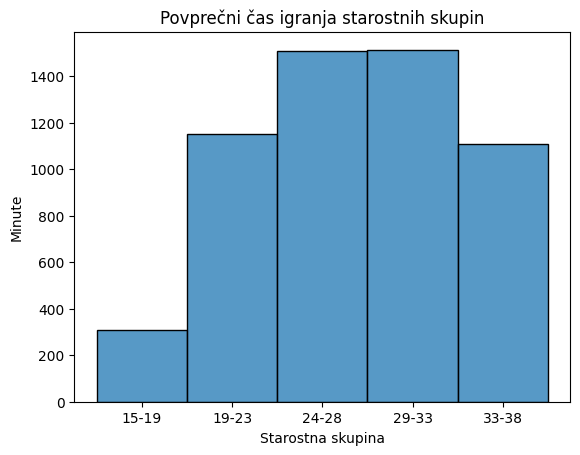

In [13]:
sns.histplot(tabela_star_skupin, x='Starostna skupina', weights='Minute')
plt.ylabel('Minute')
plt.title('Povprečni čas igranja starostnih skupin')

Iz katerih držav je največ igralcev?

In [14]:
df.groupby('Narodnost').size().sort_values()

Narodnost
ISL      1
GRN      1
IRN      1
ISR      1
CRC      1
      ... 
NED     19
ESP     20
FRA     28
BRA     33
ENG    199
Length: 66, dtype: int64

Na grafu je prikazanih 20 držav z največ igralci v Premier ligi.


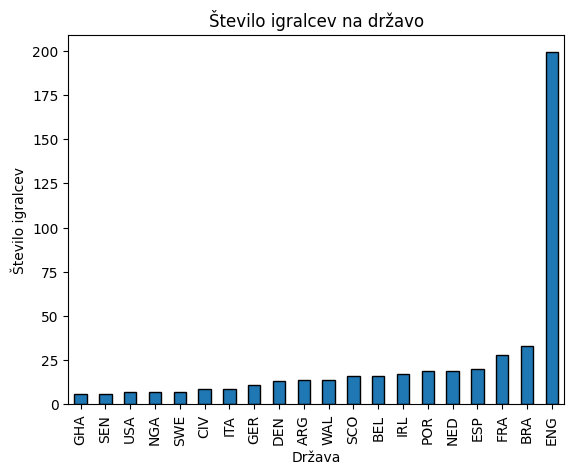

In [15]:
df.groupby('Narodnost').size().sort_values().tail(20).plot.bar(edgecolor='black')
plt.xlabel('Država')
plt.ylabel('Število igralcev')
plt.title('Število igralcev na državo')

print('Na grafu je prikazanih 20 držav z največ igralci v Premier ligi.')


Poleg nastopa posameznih igralcev nas zanima tudi nastop oz. statistika posamezne ekipe. Razvrstimo sedaj igralce po ekipah glede na število golov.

In [16]:
ekipe = df.groupby('Ekipa')

for ekipa, igralci in ekipe:
    print(f'{ekipa}')
    print(igralci.sort_values(['Goli', 'Asistence', 'Minute'], ascending=[False, False, False])[['Položaj', 'Starost', 'Minute', 'Goli', 'Asistence']])

Arsenal
                 Položaj  Starost  Minute  Goli  Asistence
Ime                                                       
Bukayo Saka           FW       21    2919    16          9
Kai Havertz       MF, FW       24    2634    13          7
Leandro Trossard  FW, MF       28    1649    12          1
Martin Ødegaard       MF       24    3091     8         10
Declan Rice           MF       24    3225     7          8
...                  ...      ...     ...   ...        ...
Reiss Nelson          FW       23     268     0          0
Jurriën Timber        DF       22      71     0          0
Cédric Soares         DF       31      62     0          0
Mohamed Elneny        MF       31      28     0          0
Ethan Nwaneri         FW       16      14     0          0

[25 rows x 5 columns]
Aston Villa
                       Položaj  Starost  Minute  Goli  Asistence
Ime                                                             
Ollie Watkins               FW       27    3217    19       

Koliko golov je dala posamezna ekipa in katera ekipa je nabrala največje število golov?

In [17]:
st_golov = df.groupby('Ekipa')['Goli'].sum()
padajoce_st_golov = st_golov.sort_values(ascending=False)
print(padajoce_st_golov)

print(f'Ekipa {st_golov.idxmax()} je dala največ golov ({st_golov.max()}).')

Ekipa
Manchester City    94
Arsenal            86
Newcastle Utd      83
Liverpool          80
Chelsea            76
Aston Villa        72
Tottenham          69
West Ham           58
Manchester Utd     57
Crystal Palace     56
Fulham             54
Brentford          54
Bournemouth        52
Brighton           50
Luton Town         49
Nott'ham Forest    49
Wolves             47
Burnley            40
Everton            40
Sheffield Utd      31
Name: Goli, dtype: int64
Ekipa Manchester City je dala največ golov (94).


Text(0.5, 1.0, 'Število golov na ekipo')

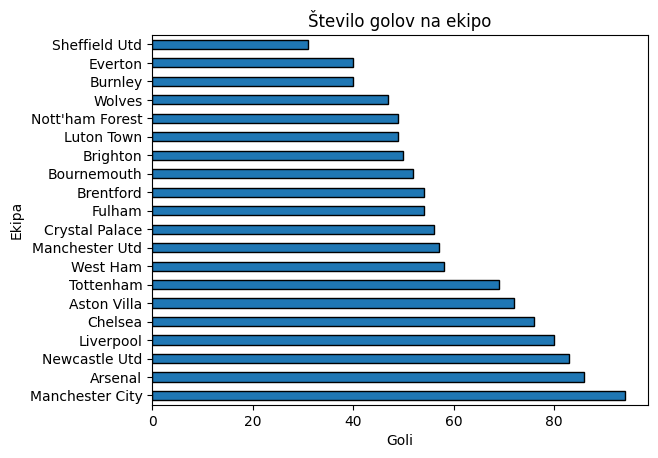

In [18]:
padajoce_st_golov.plot.barh(edgecolor='black')
plt.xlabel('Goli')
plt.title('Število golov na ekipo')

Za konec si poglejmo še, katere ekipe imajo največ takih strelcev, ki so zadeli več kot 10 golov.

In [19]:
strelci_z_vec_kot_10_goli = df[df.Goli > 10]
strelci_z_vec_kot_10_goli.groupby('Ekipa').size().sort_values(ascending=False)

Ekipa
Arsenal            3
Manchester City    3
Chelsea            2
Crystal Palace     2
Liverpool          2
Newcastle Utd      2
Tottenham          2
Wolves             2
Aston Villa        1
Bournemouth        1
Brentford          1
Luton Town         1
Nott'ham Forest    1
West Ham           1
dtype: int64